## Data Import

In [6]:
library(dplyr)
library(arules)

bookings <- read.csv("output.csv")
head(bookings)

X,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,booking_day_of_year
0,1,0,342,7,27,1,0,0,2,...,2,3,0,0,2,0,0,0,1,182
1,1,0,737,7,27,1,0,0,2,...,2,4,0,0,2,0,0,0,1,182
2,1,0,7,7,27,1,0,1,1,...,2,0,0,0,2,75,0,0,1,182
3,1,0,13,7,27,1,0,1,1,...,0,0,0,0,2,75,0,0,1,182
4,1,0,14,7,27,1,0,2,2,...,0,0,0,0,2,98,0,1,1,182
5,1,0,14,7,27,1,0,2,2,...,0,0,0,0,2,98,0,1,1,182


In [35]:
# Discretize lead_time and adr to (low, medium, high)

bookings <- discretizeDF(bookings, methods = list(
  lead_time = list(method = "frequency", breaks = 3, 
    labels = c("Low", "Medium", "High")),
  adr = list(method = "frequency", breaks = 3, 
    labels = c("Low", "Medium", "High")),
  stays_in_weekend_nights = list(method = "frequency", breaks = 3, 
    labels = c("Low", "Medium", "High")),
  stays_in_week_nights = list(method = "frequency", breaks = 3, 
    labels = c("Low", "Medium", "High")),
  adults = list(method = "frequency",  breaks = 3, 
    labels = c("Low", "Medium", "High"))
  ),
  default = list(method = "none")
  )
head(bookings)


X,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,booking_day_of_year
0,1,0,High,7,27,1,Low,Low,High,...,2,3,0,0,2,Low,0,0,1,182
1,1,0,High,7,27,1,Low,Low,High,...,2,4,0,0,2,Low,0,0,1,182
2,1,0,Low,7,27,1,Low,Low,Low,...,2,0,0,0,2,Low,0,0,1,182
3,1,0,Low,7,27,1,Low,Low,Low,...,0,0,0,0,2,Low,0,0,1,182
4,1,0,Low,7,27,1,Low,Medium,High,...,0,0,0,0,2,Medium,0,1,1,182
5,1,0,Low,7,27,1,Low,Medium,High,...,0,0,0,0,2,Medium,0,1,1,182


In [23]:
index <- 1:ncol(bookings)
bookings[ , index] <- lapply(bookings[ , index], as.factor)
str(bookings)

'data.frame':	119390 obs. of  29 variables:
 $ X                             : Factor w/ 119390 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ hotel                         : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ lead_time                     : Factor w/ 3 levels "Low","Medium",..: 3 3 1 1 1 1 1 1 2 2 ...
  ..- attr(*, "discretized:breaks")= num  0 32 124 737
  ..- attr(*, "discretized:method")= chr "frequency"
 $ arrival_date_month            : Factor w/ 12 levels "1","2","3","4",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ arrival_date_week_number      : Factor w/ 53 levels "1","2","3","4",..: 27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : Factor w/ 31 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : Factor w/ 2 levels "Low","High": 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "discretized:breaks")= num  0 1 19
  ..- attr(*, "discretize

In [24]:
head(bookings)

X,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,booking_day_of_year
0,1,0,High,7,27,1,Low,Low,High,...,2,3,0,0,2,Low,0,0,1,182
1,1,0,High,7,27,1,Low,Low,High,...,2,4,0,0,2,Low,0,0,1,182
2,1,0,Low,7,27,1,Low,Low,Low,...,2,0,0,0,2,Low,0,0,1,182
3,1,0,Low,7,27,1,Low,Low,Low,...,0,0,0,0,2,Low,0,0,1,182
4,1,0,Low,7,27,1,Low,Medium,High,...,0,0,0,0,2,Medium,0,1,1,182
5,1,0,Low,7,27,1,Low,Medium,High,...,0,0,0,0,2,Medium,0,1,1,182


## Transactions

transactions as itemMatrix in sparse format with
 119390 rows (elements/itemsets/transactions) and
 120176 columns (items) and a density of 0.0002413127 

most frequent items:
                        babies=0 previous_bookings_not_canceled=0 
                          118473                           115770 
          days_in_waiting_list=0              is_repeated_guest=0 
                          115692                           115580 
        previous_cancellations=0                          (Other) 
                          112906                          2883889 

element (itemset/transaction) length distribution:
sizes
    29 
119390 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     29      29      29      29      29      29 

includes extended item information - examples:
  labels variables levels
1    X=0         X      0
2    X=1         X      1
3    X=2         X      2

includes extended transaction information - examples:
  transactionID
1             1
2         

'data.frame':	119390 obs. of  29 variables:
 $ X                             : Factor w/ 119390 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ hotel                         : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ lead_time                     : Factor w/ 3 levels "Low","Medium",..: 3 3 1 1 1 1 1 1 2 2 ...
  ..- attr(*, "discretized:breaks")= num  0 32 124 737
  ..- attr(*, "discretized:method")= chr "frequency"
 $ arrival_date_month            : Factor w/ 12 levels "1","2","3","4",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ arrival_date_week_number      : Factor w/ 53 levels "1","2","3","4",..: 27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : Factor w/ 31 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : Factor w/ 2 levels "Low","High": 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "discretized:breaks")= num  0 1 19
  ..- attr(*, "discretize

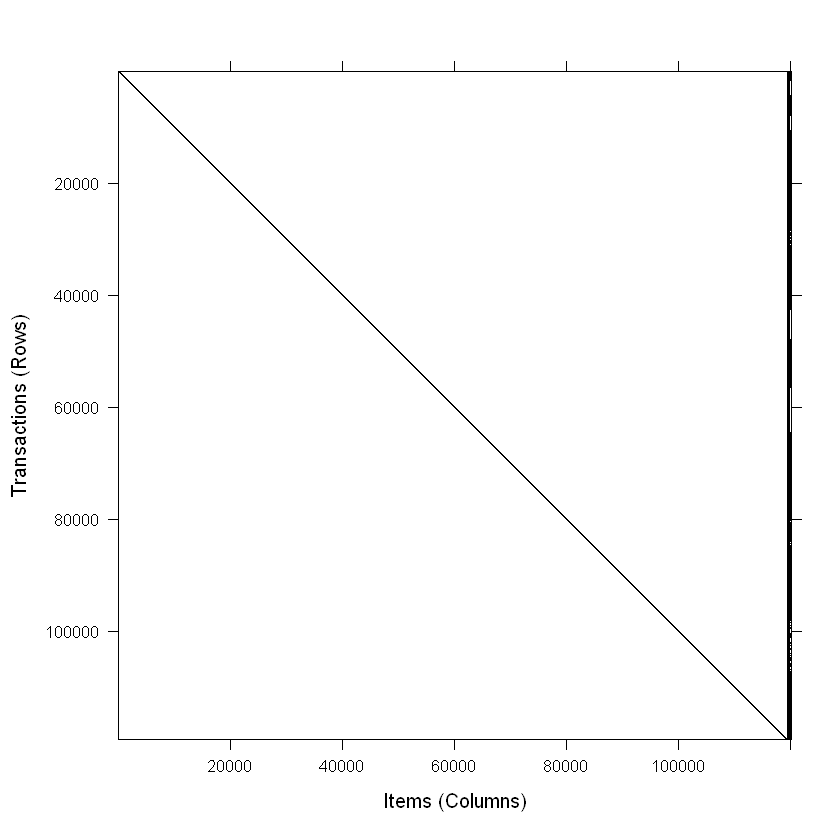

In [25]:
trans <- as(bookings, "transactions")
image(trans)
summary(trans)

str(bookings)
str(trans)

## Apriori

In [26]:
rules <- apriori(trans,parameter=list(minlen=2, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("adr=Low","adr=Medium","adr=High"),default="lhs"))

rules_lift <- sort(rules, by="lift")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
length(rules_pruned)

[1] 1872

In [27]:
inspect(rules_pruned,by="lift")


       lhs                                   rhs              support confidence    coverage     lift count
[1]    {market_segment=4,                                                                                  
        previous_cancellations=1,                                                                          
        customer_type=0}                  => {adr=Low}    0.005854762  1.0000000 0.005854762 3.001710   699
[2]    {lead_time=High,                                                                                    
        market_segment=4,                                                                                  
        customer_type=0,                                                                                   
        reservation_status=0}             => {adr=Low}    0.005863138  1.0000000 0.005863138 3.001710   700
[3]    {is_canceled=1,                                                                                     
        lead_time=High,     

## Plots

In [28]:
library(arulesViz)

Warning message:
"package 'arulesViz' was built under R version 3.6.3"

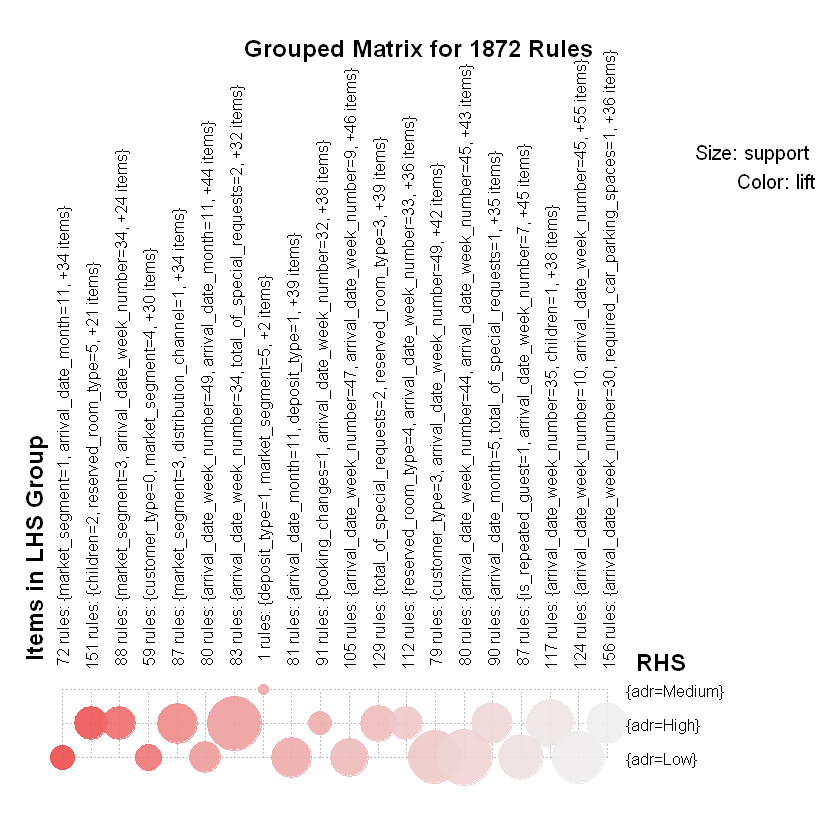

In [29]:
plot(rules_pruned, method="grouped")

Warning message:
"plot: Too many rules supplied. Only plotting the best 100 rules using 'support' (change control parameter max if needed)"

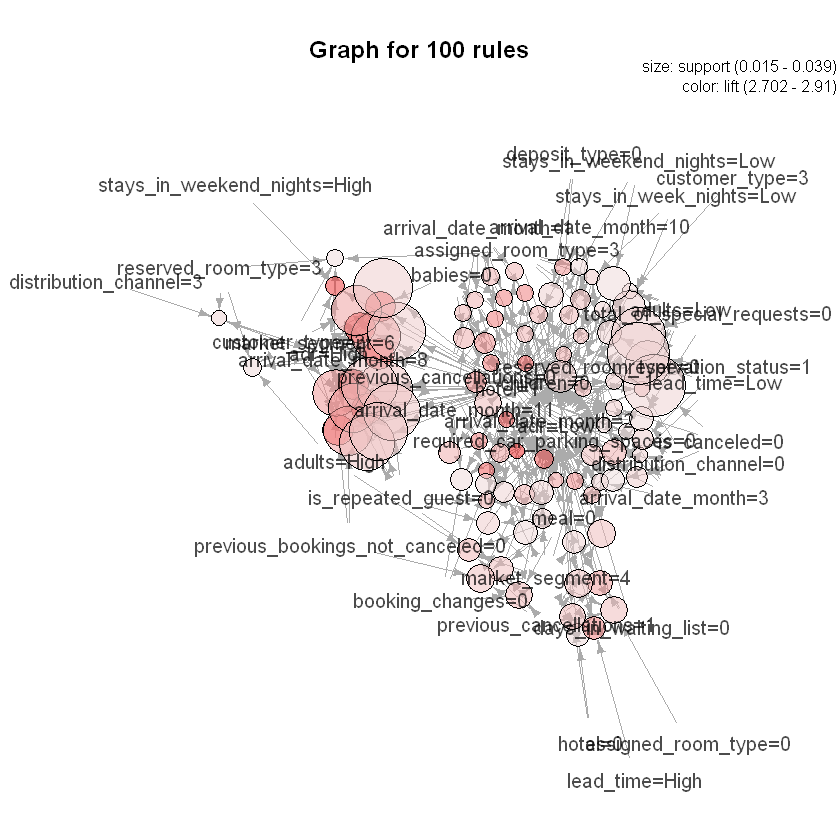

In [30]:
plot(rules_pruned, method="graph")

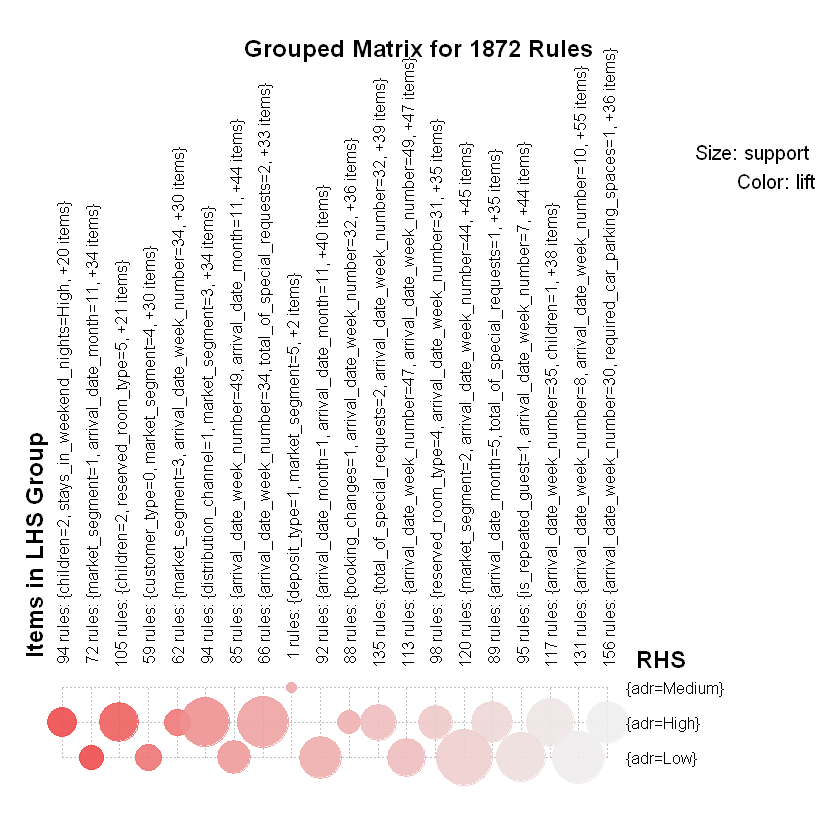

In [31]:
plot(rules_pruned, method="grouped matrix")

Warning message in plot.rules(rules_pruned, method = "matrix3D"):
"method 'matrix3D' is deprecated use method 'matrix' with engine '3d'"

Itemsets in Antecedent (LHS)
   [1] "{market_segment=4,previous_cancellations=1,customer_type=0}"                                              
   [2] "{lead_time=High,market_segment=4,customer_type=0,reservation_status=0}"                                   
   [3] "{is_canceled=1,lead_time=High,market_segment=4,customer_type=0}"                                          
   [4] "{hotel=0,lead_time=High,market_segment=4,customer_type=0}"                                                
   [5] "{lead_time=High,meal=0,market_segment=4,customer_type=0}"                                                 
   [6] "{is_canceled=1,children=2,is_repeated_guest=0,reserved_room_type=5}"                                      
   [7] "{is_canceled=1,children=2,previous_bookings_not_canceled=0,reserved_room_type=5}"                         
   [8] "{is_canceled=1,children=2,is_repeated_guest=0,assigned_room_type=5}"                                      
   [9] "{is_canceled=1,children=2,previous_bookings

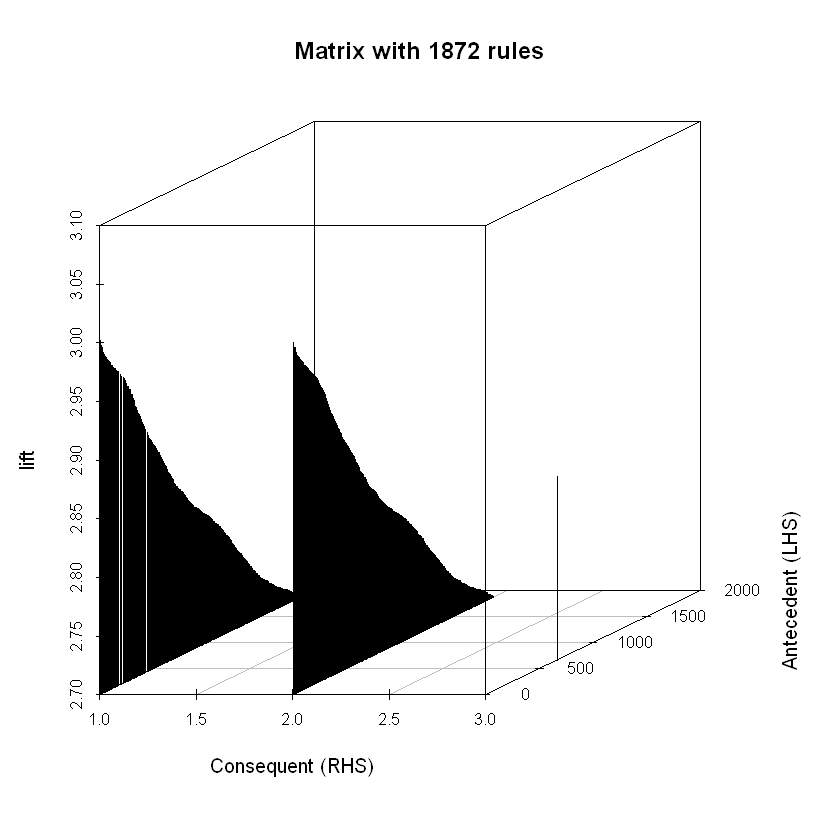

In [32]:
plot(rules_pruned, method="matrix3D")

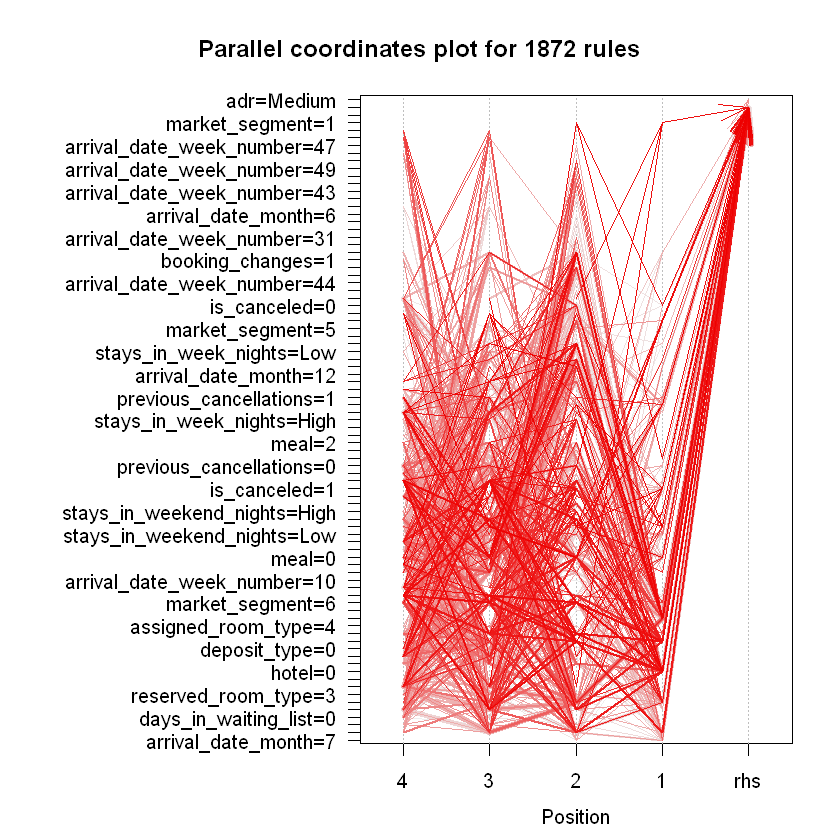

In [33]:
plot(rules_pruned, method="paracoord")

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


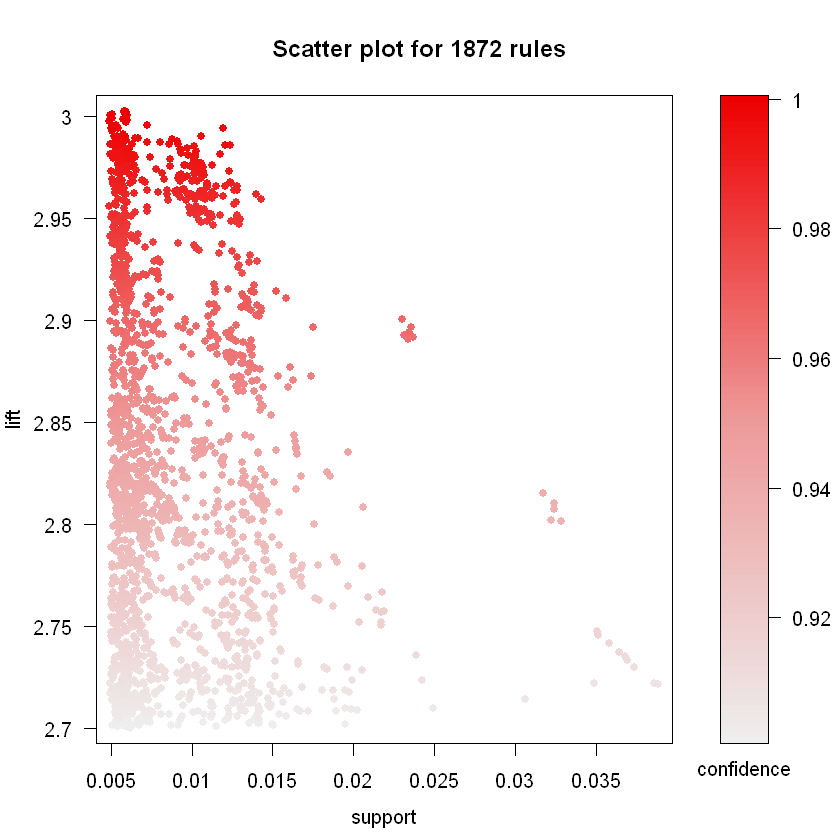

In [34]:
plot(rules_pruned, measure=c("support", "lift"), shading = "confidence")

In [45]:
top10Rules <- head(rules_pruned, n = 10, by = "confidence")
plot(top10Rules, method = "graph",  engine = "htmlwidget")
saveAsGraph(head(rules_pruned, n = 100, by = "lift"), file = "rules.graphml")

HTML widgets cannot be represented in plain text (need html)

## SubRules 

In [40]:
subrules <- rules_pruned[quality(rules_pruned)$lift > 2.95]

In [41]:
subrules

set of 266 rules 

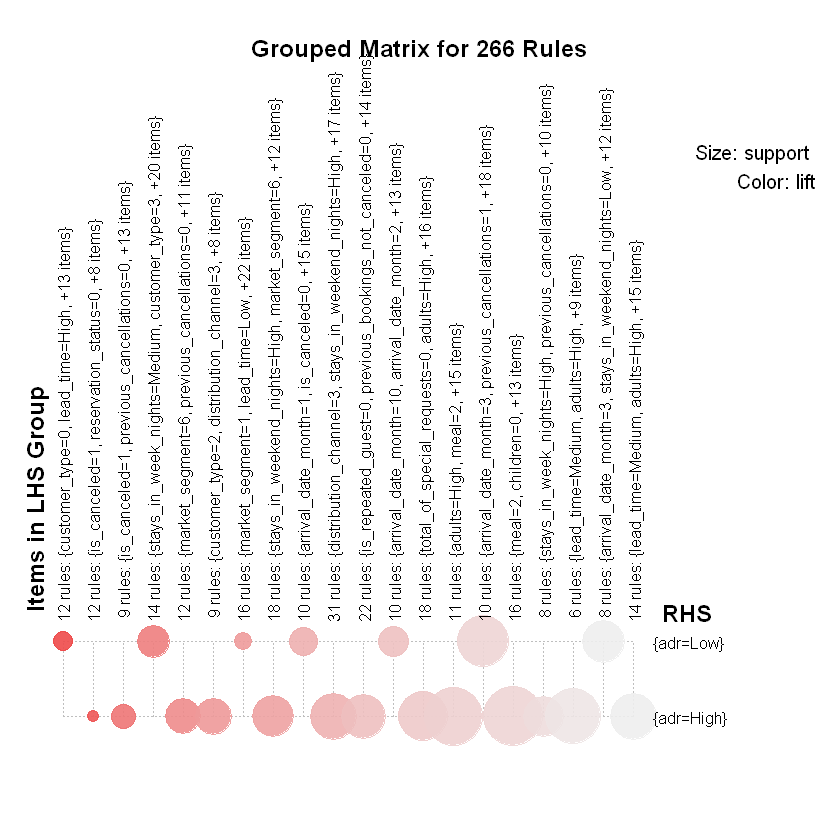

In [42]:
plot(subrules, method="grouped")


In [43]:
inspect(subrules,by="lift")


      lhs                                   rhs            support confidence    coverage     lift count
[1]   {market_segment=4,                                                                                
       previous_cancellations=1,                                                                        
       customer_type=0}                  => {adr=Low}  0.005854762  1.0000000 0.005854762 3.001710   699
[2]   {lead_time=High,                                                                                  
       market_segment=4,                                                                                
       customer_type=0,                                                                                 
       reservation_status=0}             => {adr=Low}  0.005863138  1.0000000 0.005863138 3.001710   700
[3]   {is_canceled=1,                                                                                   
       lead_time=High,                                 